<a href="https://colab.research.google.com/github/KhalilAliKain/CHL5230H-Datathon-1/blob/main/Ordered%20Logit%20Analysis%20%2B%20LRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all necessary packages
from google.colab import files
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.miscmodels.ordinal_model import OrderedModel

import warnings
warnings.filterwarnings("ignore")

In [ ]:
uploaded = files.upload()
df_lung = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))
df_lung.head()

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


**LUNG CANCER DATASET ANALYSIS**

In [ ]:
df_lung.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


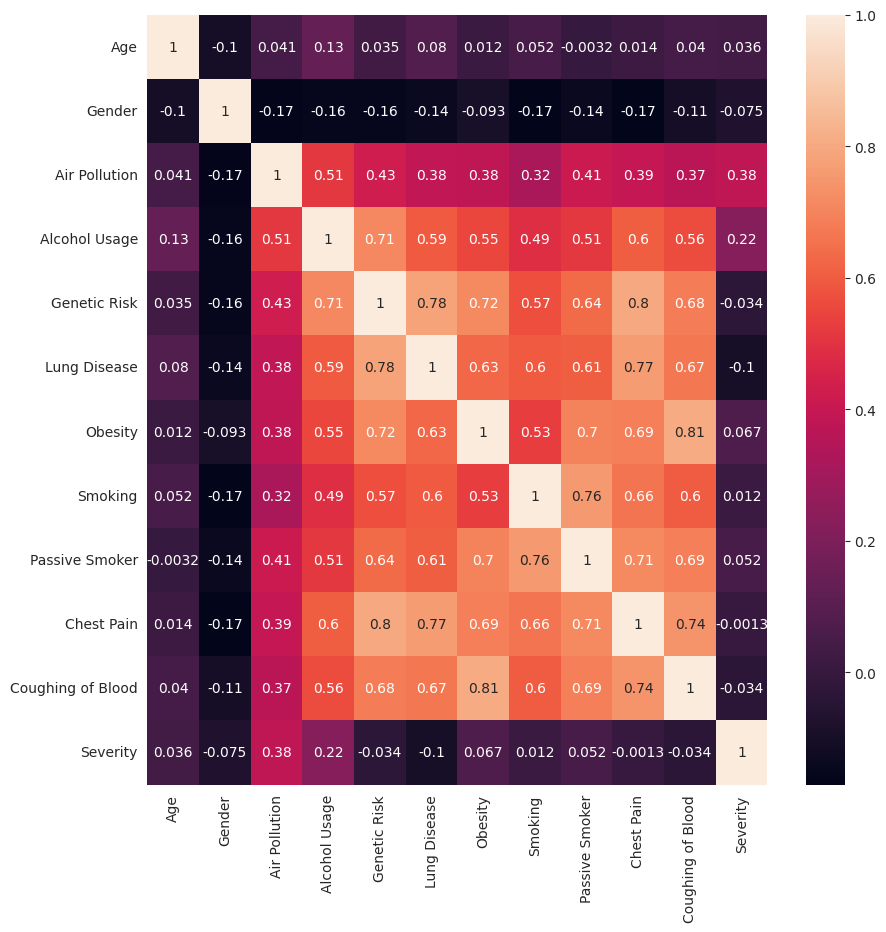

In [ ]:
# We want to check the correlation between 2 different features in lung cancer dataset
correlation = df_lung.corr()
seaborn.heatmap (correlation, annot = True)
plt.gcf().set_size_inches(10, 10)

In [ ]:
### Lung Cancer Risk Factors from Tikur Ambesa Hospital
# Here, Dependent variable is Severity and rest of the variables are independent
# variables. And we do not need encoding because there numerical input and output
# variables.

# Check for missing values in the dataset, no missing value is found here.
print(df_lung.isna().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


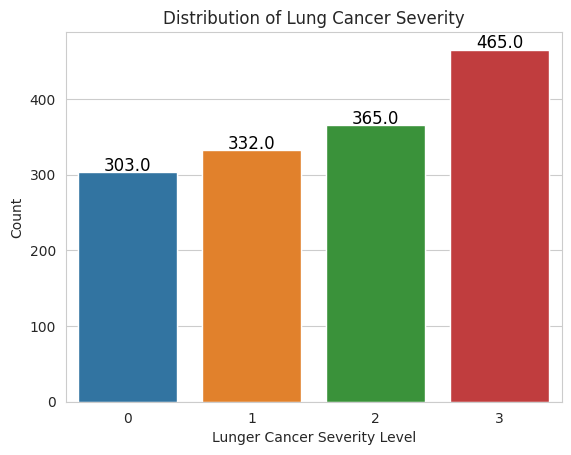

Number of unique categories in the outcome (0=Mild to 3=Critical): 4


In [ ]:
#Creating an ordinal logistic regression function for the lung cancer dataset

##First, we need to see how many factor levels severity has:

###Distribution of lung cancer severity amongst patients from Tikur Ambesa hospital
###Follow a normal distribution
###Set the style for seaborn
sns.set_style('whitegrid')

###Create a histogram
ax = sns.countplot(data=df_lung, x='Severity')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.,
    p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.countplot(data=df_lung, x='Severity')
plt.xlabel('Lunger Cancer Severity Level')
plt.ylabel('Count')
plt.title('Distribution of Lung Cancer Severity')
plt.show()

num_categories_outcome = df_lung['Severity'].nunique()
print("Number of unique categories in the outcome (0=Mild to 3=Critical):", num_categories_outcome)

In [ ]:
df_lung.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


Now we are going to conduct a likelihood ratio test to determine if the inclusion of the interaction term has an impact on the goodness of fit of the model.

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

#Creating an interaction term between 'Age' and 'Smoking'
df_lung['Age_Smoking_interaction'] = df_lung['Age'] * df_lung['Smoking']

#Looking at model summary of full model (with interaction term)
mod_log_full = OrderedModel(df_lung['Severity'],
                        df_lung[['Smoking','Age','Air Pollution','Passive Smoker','Lung Disease','Gender','Coughing of Blood','Age_Smoking_interaction']],
                        distr='logit')

reg_log_full = mod_log_full.fit(method='bfgs', disp=False)
reg_log_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:               Severity   Log-Likelihood:                -1805.2
Model:                   OrderedModel   AIC:                             3632.
Method:            Maximum Likelihood   BIC:                             3691.
Date:                Mon, 25 Sep 2023                                         
Time:                        16:10:58                                         
No. Observations:                1465                                         
Df Residuals:                    1454                                         
Df Model:                           8                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Smoking                     0.2726      0.073      3.716      0.000       0.129       0.416
Age                         0.0353      0.008      4.463      0.000       0.020       0.051
Air Pollution               0.4986      0.030     16.516      0.000       0.439       0.558
Passive Smoker              0.0833      0.042      2.005      0.045       0.002       0.165
Lung Disease               -0.4233      0.042    -10.095      0.000      -0.506      -0.341
Gender                     -0.0779      0.104     -0.747      0.455      -0.282       0.127
Coughing of Blood          -0.0794      0.031     -2.564      0.010      -0.140      -0.019
Age_Smoking_interaction    -0.0067      0.002     -4.258      0.000      -0.010      -0.004
0/1                        -0.0374      0.340     -0.110      0.912      -0.704       0.630
1/2                         0.2464      0.051      4.788      0.000       0.146       0.347
2/3                         0.2717      0.048      5.704      0.000       0.178       0.365
===========================================================================================
"""

In [ ]:
#Looking at model summary of restricted model (without interaction term)
mod_log_restricted = OrderedModel(df_lung['Severity'],
                        df_lung[['Smoking','Age','Air Pollution','Passive Smoker','Lung Disease','Gender','Coughing of Blood']],
                        distr='logit')

reg_log_null = mod_log_restricted.fit(method='bfgs', disp=False)
reg_log_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:               Severity   Log-Likelihood:                -1814.3
Model:                   OrderedModel   AIC:                             3649.
Method:            Maximum Likelihood   BIC:                             3701.
Date:                Mon, 25 Sep 2023                                         
Time:                        16:10:58                                         
No. Observations:                1465                                         
Df Residuals:                    1455                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Smoking              -0.0021      0.035     -0.061      0.951      -0.071       0.067
Age                   0.0069      0.004      1.665      0.096      -0.001       0.015
Air Pollution         0.5042      0.030     16.789      0.000       0.445       0.563
Passive Smoker        0.0785      0.042      1.883      0.060      -0.003       0.160
Lung Disease         -0.3933      0.041     -9.617      0.000      -0.474      -0.313
Gender               -0.0283      0.104     -0.274      0.784      -0.231       0.175
Coughing of Blood    -0.0728      0.031     -2.375      0.018      -0.133      -0.013
0/1                  -0.9386      0.266     -3.525      0.000      -1.460      -0.417
1/2                   0.2381      0.052      4.622      0.000       0.137       0.339
2/3                   0.2611      0.048      5.486      0.000       0.168       0.354
=====================================================================================
"""

In [ ]:
#Extracting log-likelihood values from the model summaries
log_likelihood_full = reg_log_full.llf
log_likelihood_restricted = reg_log_null.llf

#Calculating likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(log_likelihood_restricted-log_likelihood_full)

#Calculating degrees of freedom
df = (reg_log_full.df_model + 1) - (reg_log_null.df_model + 1)  # +1 for the intercept term in each model

#Calculating p-value of test statistic
p_value = scipy.stats.chi2.sf(LR_statistic, df)

print("Likelihood Ratio Test Statistic:", LR_statistic)
print("p-value:", p_value)
print("Therefore, the full model fits the data significantly better than the restricted model")

Likelihood Ratio Test Statistic: 18.198319628964327
p-value: 1.990543812048253e-05
Therefore, the full model fits the data significantly better than the restricted model
